In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Car details v3.csv")
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [4]:
df[df.isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna(how='any')

In [4]:
display(df.shape, df.isnull().sum())

(7906, 13)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


### Primeros pasos de preprocessing
* Para la variable 'name' deberiamos utilizar solo la primera palabra, que es la que denota la "Marca" del auto y considerarla como nueva variable en una columna llamada "Marca"~y otra con el modelo "Model".~
* Verificar con cada una de las columnas con "Mising values" si estas tienen alguna correlacion importante con "Selling_Price" para utilizarlas como posibles variables, de no ser asi eliminar las que no tengan una correlacion importante, (Ademas de verificar si entre estas hay una correlacion mayor al 0.8 y eliminar una de ellas para evitar problemas de "cruce")
* Suplantar la columna "Year" por una que especifique la antiguedad del vehiculo, es decir, Year-datetime.now.year.
* Torque, evaluar dos posibilidades, utilizar las variables de Newton-meter(Nm) o RPM,__(1 newton metro ≈ 0.102 kilogramo metro.)__ para el caso de RPM no habria que hacer conversiones, pero Nm si. Aunque la relacion entre Nm y RPM resulta en Potencia/HP.
> Considerancion: En el caso de los B.H.P. se tiene en cuenta la pérdida de potencia provocada por la fricción, aspecto que no se tiene en cuenta a la hora de medir la potencia utilizando la unidad de medida H.P.
* Limpiar los valores de las columnas (Torque, max_power,engine, mileage) elimnando su variable y solo utilizar el valor numerico
* _\d+Nm(?=@)_ formula Regex para extraccion de numero en Newton-meter
* _\d+\.*\d(?=@)(?<!kgm)_ formula Regex para extraccion de numero para casos de Kgm

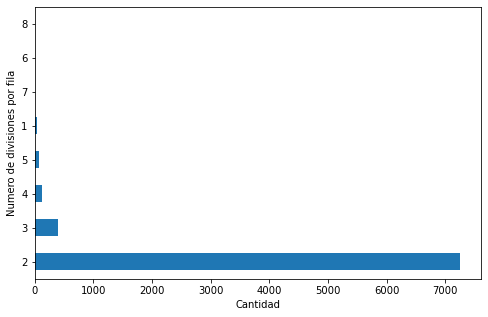

In [4]:
%matplotlib inline
spliting = [len(x) for x in df['torque'].str.split(' ')]

figure= plt.figure(figsize=(8,5))
pd.Series(spliting).value_counts().plot(kind='barh')
plt.ylabel('Numero de divisiones por fila')
plt.xlabel('Cantidad')

plt.show()

### Creacion de columna para RPM

Dicho grafico explica como esta distribuido la variable torque, segun los difrentes modos en los que se ingresaron los datos. Lo ideal seria utilizar aquellos que estan compuestos de dos(2) elementos, pero en este caso, intentare recuperar la mayoria de muestras que pueda.

In [4]:
# Para splits cuya longitud es igual a 4 el orden de las variables es irregular, por eso solo tomaremos el ultimo valor para estos casos
#y procederemos a eliminar las filas de los valores errados
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4}
rpm = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
display(len(rpm), rpm)

7906

['2000rpm',
 '1500-2500rpm',
 '2,700(kgm@',
 '1750-2750rpm',
 '4,500(kgm@',
 '4000rpm',
 '4,500(kgm@',
 '2500rpm',
 '1800-2400rpm',
 '2000rpm',
 '2250rpm',
 '4500rpm',
 '2000rpm',
 '3500rpm',
 '3500-3600rpm',
 '1750rpm',
 '1750-2750rpm',
 '3000rpm',
 '1500-2750rpm',
 '2000rpm',
 '1750rpm',
 '2000rpm',
 '1750rpm',
 '3500rpm',
 '4000rpm',
 '3500rpm',
 '1750rpm',
 '3500rpm',
 '2500rpm',
 '1750rpm',
 '3000rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '3500rpm',
 '4850rpm',
 '4000rpm',
 '1700-2700rpm',
 '2500rpm',
 '1750-2500rpm',
 '4600rpm',
 '4800rpm',
 '4000rpm',
 '1750rpm',
 '3500rpm',
 '1400-3400rpm',
 '1400-3400rpm',
 '1250-4000rpm',
 '1750rpm',
 '2000-2500rpm',
 '1750rpm',
 '4400rpm',
 '1750rpm',
 '1200-3400rpm',
 '1200-3600rpm',
 '1750-2500rpm',
 '4000rpm',
 '1750-3000rpm',
 '1400-2800rpm',
 '1750-3000rpm',
 '4000rpm',
 '1500-2750rpm',
 '2000rpm',
 '4000rpm',
 '4000rpm',
 '1500-3000rpm',
 '1750rpm',
 '3500rpm',
 '1500-3000rpm',
 '1750rpm',
 '1750rpm',
 '4000rpm',
 '2000rpm',
 '1400-340

In [5]:
d = {2:1, 3:1, 5:3, 6:3, 7:3, 8:4} # de acuerdo a la longitud de x hara un mapping para saber en que celda se encuentra el rpm
df['rpm'] = [x[d.get(len(x),-1)]  for x in df['torque'].str.split(' ')]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,"2,700(kgm@"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1750-2750rpm
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,"4,500(kgm@"


Intentando unificar los caracters que separan algunos valores, ademas de ajustar algunos valores que no pudieron limpiarse al momento de extraccion.

In [6]:
df['rpm'].replace({'\,': '',
                   'rpm':'',
                   '\(kgm@':'',
                   '\-':' ',
                   '\~':' ',
                   '\+/-':' ',
                   '\+/':' ',
                   '400Nm': '4000',
                  '\(NM@': ''}, regex=True, inplace=True)

In [7]:
df = df.drop(index=df[(df.rpm =='')].index, axis='index')
df = df.drop(index=df[(df.rpm =='/')].index, axis='index')
df = df.drop(index=df[(df.rpm =='480Nm')].index, axis='index') # Porque estas celdas no tienen valor de 'rpm'.

In [8]:
def division_rpm(valor):
    if len(valor.split(' ')) == 3:
        a, b, c = valor.split(' ')
        resultado = (int(a)+int(c))/2
    elif len(valor.split(' ')) == 2:
        a, b = valor.split(' ')
        resultado = (int(a)+int(b))/2
    else:
        resultado = int(valor)        
    return resultado

In [9]:
df['rpm'] = df['rpm'].apply(division_rpm)

### Creacion de columna Newton-meter

In [10]:
Nm_test = pd.Series([x[0] for x in df['torque'].str.split(' ')])
display('Nm@' in Nm_test[0], Nm_test[0].endswith('m@'), Nm_test[:10])

True

True

0       190Nm@
1       250Nm@
2        12.7@
3         22.4
4        11.5@
5    113.75nm@
6         7.8@
7        59Nm@
8       170Nm@
9       160Nm@
dtype: object

In [12]:
display(Nm_test[Nm_test.str.contains(r'\d+\.*\d+',regex=True)],
        len(Nm_test[Nm_test.str.contains(r'\d+\.*\d+',regex=True)]),
       Nm_test[~Nm_test.str.contains(r'\d+\.*\d+',regex=True)],
       len(Nm_test[~Nm_test.str.contains(r'\d+\.*\d+',regex=True)]))

0         190Nm@
1         250Nm@
2          12.7@
3           22.4
4          11.5@
          ...   
7853    113.7Nm@
7854         24@
7855      190Nm@
7856      140Nm@
7857      140Nm@
Length: 7857, dtype: object

7857

4747    6@
dtype: object

1

Para valores en los cuales el resultado del findall no es del tipo list (no sé porque algunos casos no los convierte a list), no puede leer sus elementos con [0], es decir no cumplen las mismas condiciones que el ejemplo a continuacion...

In [20]:
list(map(float, re.findall('(\d+\.*\d+)(?=Nm@)', Nm_test[5], flags=re.IGNORECASE)))

[113.75]

In [53]:
float(re.findall('(\d+\.*\d+)', Nm_test[6])[0])/np.array(0.102)

76.47058823529412

### *Primer intento fallido*

In [22]:
def clean_nm(valor):
    if 'kgm' in valor:
        resultado = float(re.findall(r'\d+\.*\d+(?=kgm)', valor)[0])/0.102 # Conversion de Kgm a Nm
        #El resultado del re.findall es del tipo list, por ello extraemos el item con [0]
    elif valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = re.findall('\d+\.*\d+(?=Nm@)',valor, flags=re.IGNORECASE)
    
    else:
        resultado = float(re.findall(r'\d+\.*\d+', valor)[0])/0.102
    return resultado    

Hacemos mas facil el proceso, filtrando unicamente aquellos valores con NM (la mayoria) y aquellos que son distintos suponemos que estan escritos como 'kgm'

In [10]:
def clean_nm_2(valor):
    if valor.endswith(('Nm@', 'nm@', 'NM')):
        resultado = float(re.findall('(\d+\.*\d+)(?=\s*Nm)',valor, flags=re.IGNORECASE)[0])
    else:
        resultado = float(re.findall(r'\d+\.*\d*', valor)[0])/np.array(0.102)
    return resultado

Cantidad de valores que cumplen con la condicion de ser NM, (casos que siguen el formato ejm: 21.54 Nm) la mayoria de los valores en la muestra cumplen con la correcta redaccion.

In [89]:
Nm_test[Nm_test.str.contains(r'(\d+\.*\d+)(?=Nm)', flags= re.IGNORECASE, regex=True)].shape

C:\Users\usuario\Anaconda3\envs\carpre\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(7248,)

In [104]:
Nm_test.apply(clean_nm_2)

0       190.000000
1       250.000000
2       124.509804
3       219.607843
4       112.745098
           ...    
7853    113.700000
7854    235.294118
7855    190.000000
7856    140.000000
7857    140.000000
Length: 7858, dtype: float64

In [11]:
df['Newton-meters'] = [x[0] for x in df['torque'].str.split(' ')]
display(df.head(), df.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000.0,190Nm@
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2000.0,250Nm@
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700.0,12.7@
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2250.0,22.4
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500.0,11.5@


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000.0,113.7Nm@
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2325.0,24@
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000.0,190Nm@
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,2400.0,140Nm@
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,2400.0,140Nm@


In [12]:
df['Newton-meters'] = df['Newton-meters'].apply(clean_nm_2)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,rpm,Newton-meters
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000.0,190.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2000.0,250.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700.0,124.509804
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2250.0,219.607843
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500.0,112.745098


In [13]:
df['marca'] = [x[0] for x in df['name'].str.split(' ')]
df['model'] = [x[1] for x in df['name'].str.split(' ')]
df['num_year'] = datetime.now().year-df.year
for col in ['engine', 'max_power', 'mileage']:
    df[col] = df[col].apply(lambda x: float(re.findall('\d+\.*\d*', x)[0]))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7858 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7858 non-null   object 
 1   year           7858 non-null   int64  
 2   selling_price  7858 non-null   int64  
 3   km_driven      7858 non-null   int64  
 4   fuel           7858 non-null   object 
 5   seller_type    7858 non-null   object 
 6   transmission   7858 non-null   object 
 7   owner          7858 non-null   object 
 8   mileage        7858 non-null   float64
 9   engine         7858 non-null   float64
 10  max_power      7858 non-null   float64
 11  torque         7858 non-null   object 
 12  seats          7858 non-null   float64
 13  rpm            7858 non-null   float64
 14  Newton-meters  7858 non-null   float64
 15  marca          7858 non-null   object 
 16  model          7858 non-null   object 
 17  num_year       7858 non-null   int64  
dtypes: float

In [14]:
df['seats'] = df.seats.astype('int32')

In [15]:
# Potencia de un motor: Nm x rpm x 2π/60
df['potencia'] = df['Newton-meters']*df['rpm']*(np.pi/60)

In [16]:
df_filter = df.drop(labels=['name', 'year', 'torque'], axis='columns')

In [17]:
df_filter.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,rpm,Newton-meters,marca,model,num_year,potencia
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,2000.0,190.000000,Maruti,Swift,7,19896.753473
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,2000.0,250.000000,Skoda,Rapid,7,26179.938780
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,2700.0,124.509804,Honda,City,15,17602.158838
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,2250.0,219.607843,Hyundai,i20,11,25871.939500
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,4500.0,112.745098,Maruti,Swift,14,26564.937880


In [18]:
df_filter = df_filter.reindex(columns=['marca', 'model', 'fuel', 'seller_type', 'transmission', 'owner', 'seats', 'num_year', 'km_driven', 'mileage', 'engine', 'max_power', 'rpm', 'Newton-meters', 'potencia','selling_price'])

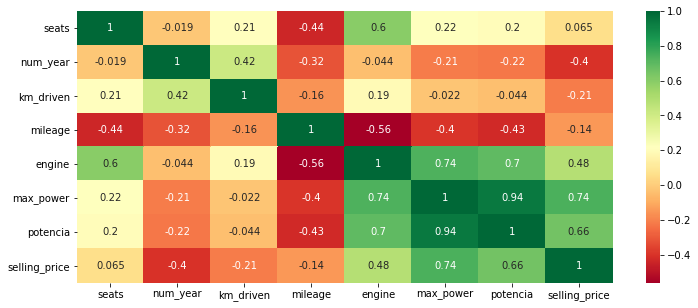

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap(df_filter.corr(), cmap='RdYlGn', annot=True)
plt.show()

Las variables que mas desconfianza me genera al momento de evaluar el _'Selling_price'_ las evaluare mediante un grafico para ver como se comporta y como se distribuyen las muestras

Esta informacion nos ayudará a identificar algunos 'outliers' y proceder a eliminarlos, eliminaremos los Newton-meters mayor a 700 Nm, por capacidad fisica de la mayoria de autos

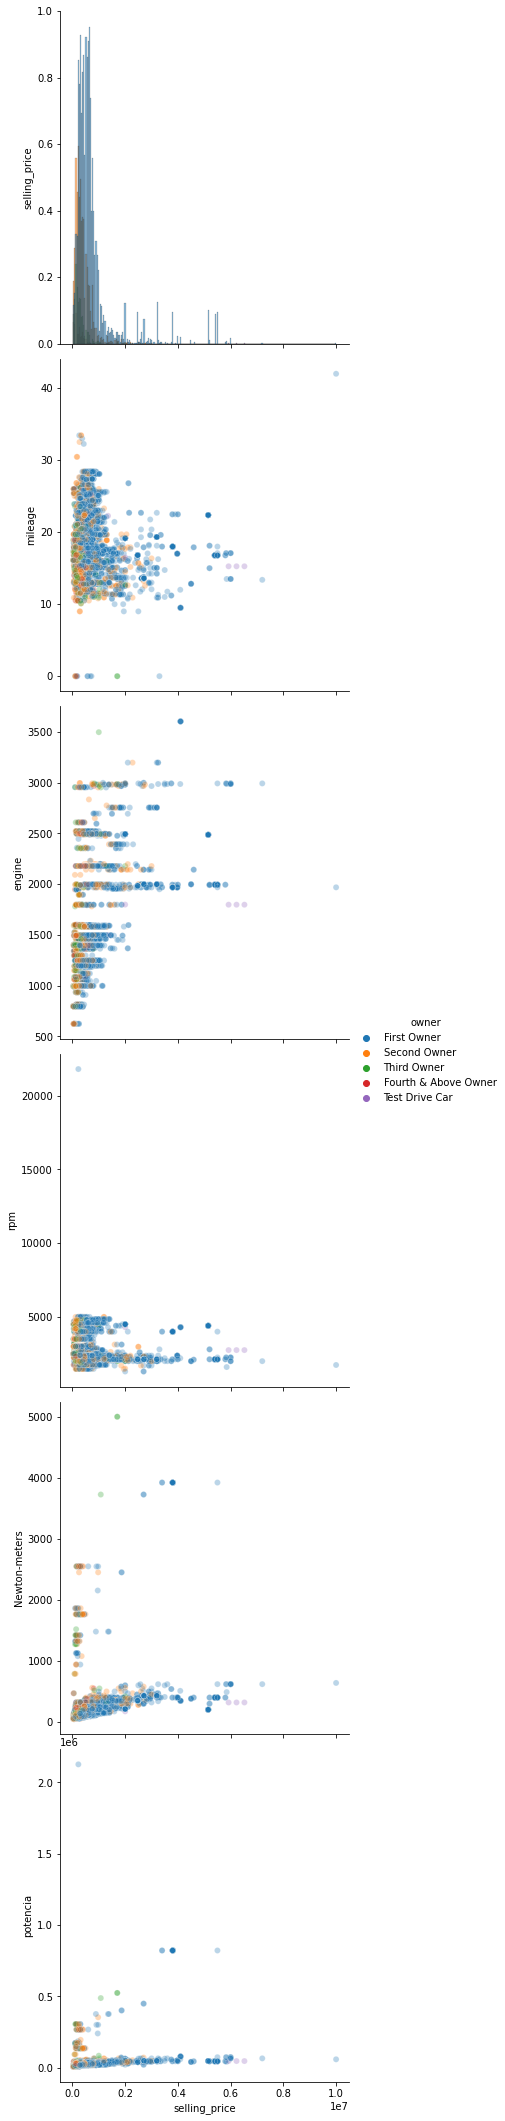

In [20]:
y_vars= ['selling_price','mileage', 'engine', 'rpm', 'Newton-meters', 'potencia']
x_vars= ['selling_price']
g = sns.PairGrid(df_filter, height=5, hue='owner', x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color='.3')
g.map_offdiag(sns.scatterplot, alpha=.3)
g.add_legend()

In [21]:
df_filter.drop(index=df_filter[df_filter['Newton-meters'] > 720].index, inplace=True)
df_filter.drop(index=df_filter[df_filter['mileage']> 40].index, inplace=True)
df_filter.drop(index=df_filter[df_filter['rpm']> 5000].index, inplace=True)

Comprobamos que la relacion entre Newton-meters vs rpm **(potencia)** tiene mayor correlacion con respecto a la variable independiente _'Selling_price'_, por ello procedemos a eliminar estas dos variables ~Newton-meters & rpm~

In [22]:
df_filter.drop(labels=['Newton-meters', 'rpm'], axis='columns', inplace=True)

> Nota: Intentar manejar dos escenarios:
1.Manejar todas las categorias de las marcas
2.Segmentar las marcas por valor maximo, para agrupar autos del mismo estrato.

In [24]:
marcas_count = df_filter.groupby('marca')['selling_price'].count().sort_values(ascending=False)
marcas_count

marca
Maruti           2353
Hyundai          1354
Tata              688
Mahindra          669
Toyota            452
Honda             443
Ford              383
Chevrolet         230
Renault           228
Volkswagen        185
BMW               117
Skoda              93
Nissan             81
Jaguar             71
Datsun             65
Mercedes-Benz      52
Fiat               41
Audi               40
Lexus              34
Volvo              32
Jeep               31
Mitsubishi         14
Force               6
Land                5
Ambassador          4
Kia                 4
MG                  3
Isuzu               3
Daewoo              3
Opel                1
Ashok               1
Name: selling_price, dtype: int64

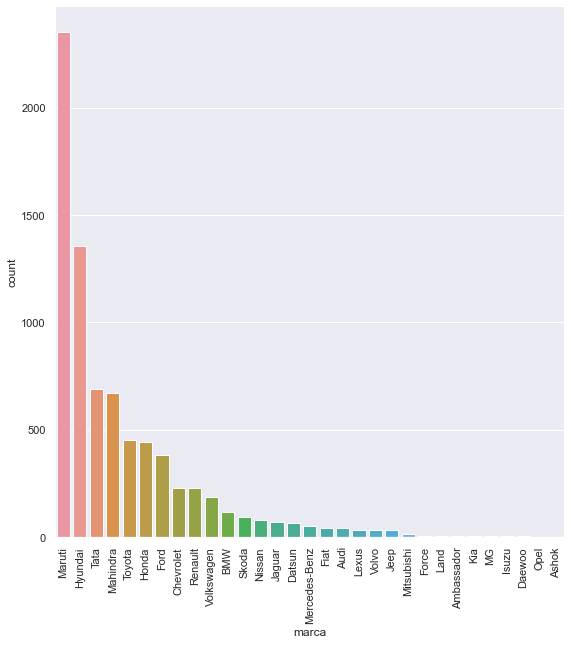

In [25]:
sns.set_theme(style='darkgrid')
m = sns.catplot(data=df_filter, x='marca', kind='count', order=marcas_count.index, height=8)
m.set_titles('Cantidad de autos según marca')
m.set_xticklabels(rotation=90)

In [26]:
# Utilizo el descending order, para colocar primero los menos valorados para al momeno de segmentar, el 0 sea el menos valorizado
# que el 25
marcas_max = df_filter.groupby('marca')['selling_price'].agg(['count','min', 'max', 'mean']).sort_values('max', ascending=True)
marcas_max

,count,min,max,mean
marca,,,,
Opel,1,68000,68000,6.800000e+04
Daewoo,3,45000,100000,7.700000e+04
Ambassador,4,75000,200000,1.240000e+05
Ashok,1,300000,300000,3.000000e+05
Datsun,65,150000,590000,3.146000e+05
Fiat,41,100000,700000,3.171951e+05
Force,6,555000,1050000,8.875000e+05
Nissan,81,110000,1200000,4.654074e+05
Maruti,2353,29999,1200000,4.103856e+05


In [27]:
categories = np.array(marcas_max.index)
ordinal = OrdinalEncoder(categories=[categories]) # Colocar en corchetes
ordinal.fit(df_filter[['marca']])
df_filter['marca_label'] = ordinal.transform(df_filter[['marca']])
display(ordinal.inverse_transform([[0], [25], [12]]) , pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 31]))

array([['Opel'],
       ['Jeep'],
       ['Tata']], dtype=object)

0        (5, 15]
1       (15, 25]
2       (15, 25]
3       (15, 25]
4        (5, 15]
          ...   
8123    (15, 25]
8124    (15, 25]
8125     (5, 15]
8126     (5, 15]
8127     (5, 15]
Name: marca_label, Length: 7686, dtype: category
Categories (4, interval[int64]): [(-1, 5] < (5, 15] < (15, 25] < (25, 31]]

In [239]:
"Opel" in categories

True

In [28]:
marcat = pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 32], labels=['Cheaper', 'Afordable', 'Normal', 'Expensive'])
display(len(df_filter[['marca']]),len(marcat))

7686

7686

In [29]:
df_filter['marca_group'] = pd.cut(df_filter['marca_label'], bins=[-1, 5, 15, 25, 31], labels=['Cheaper', 'Afordable', 'Normal', 'Expensive'])
df_filter[df_filter.marca == 'Opel']

,marca,model,fuel,seller_type,transmission,owner,seats,num_year,km_driven,mileage,engine,max_power,potencia,selling_price,marca_label,marca_group
4372,Opel,Astra,Petrol,Individual,Manual,Third Owner,5,23,110000,13.1,1598.0,77.0,17739.526517,68000,0.0,Cheaper


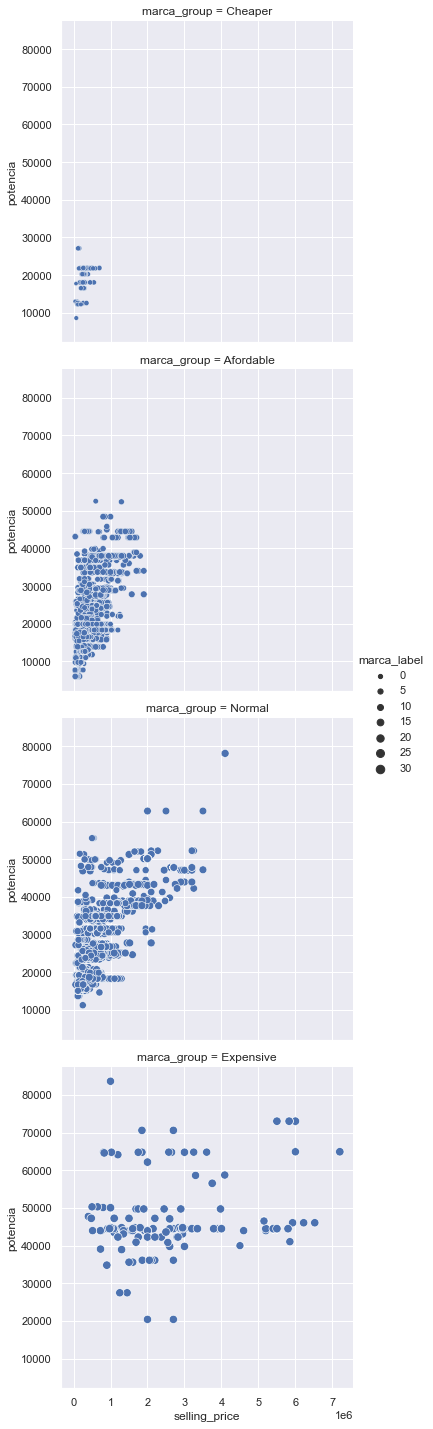

In [28]:
p = sns.relplot(data=df_filter, x='selling_price', y='potencia', row='marca_group', size='marca_label')

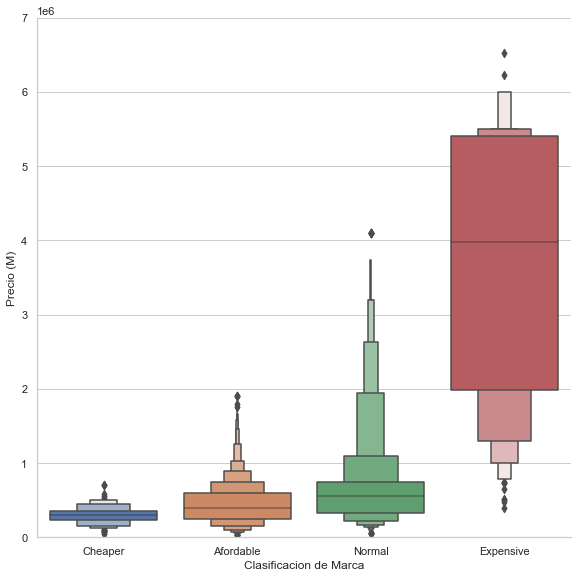

In [29]:
sns.set_style('whitegrid')
vi = sns.catplot(data=df_filter, x='marca_group', y='selling_price', kind='boxen', height=8)
vi.set_axis_labels('Clasificacion de Marca', 'Precio (M)')
vi.set_titles('Distribucion de precios por Categoria de Marcas')
vi.set(ylim=(0,7000000))

No sé si estare haciendo algun daño al modelo de entrenamiento al dejar una diferencia tan alta entre la clase "Expensive", con respecto a las demas. Baso esta decision en que hay marcas de autos que son muchisimo mas caras que el resto. (BMW, Audi, Lexus, Mercedes-Benz)

## Boceto de creacion de Pipeline's

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [31]:
df_final = df_filter.copy()

In [32]:
df_final.drop(labels=['marca', 'model','marca_label', 'potencia', 'engine', 'seats'], axis='columns', inplace=True)

In [33]:
X = df_final.drop(labels='selling_price', axis=1)
y= df_final.selling_price

In [34]:
# Para evitar que la distribucion de las marcas esten desproporcianada, dado que es importante la desproporcion entre la marca
# Expensive con respecto a las demas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_final[['marca_group']])

In [35]:
display(X_train.head(), y_train.head(), X_train.shape, X_test.shape)

,fuel,seller_type,transmission,owner,num_year,km_driven,mileage,max_power,marca_group
6062,Diesel,Individual,Manual,First Owner,4,60000,22.54,88.73,Normal
2694,Diesel,Individual,Manual,First Owner,8,173000,12.05,120.00,Afordable
3053,Petrol,Individual,Manual,First Owner,3,15000,21.21,81.80,Afordable
427,Diesel,Dealer,Automatic,First Owner,3,2000,16.80,150.00,Normal
2484,LPG,Individual,Manual,Third Owner,11,70000,13.45,62.10,Normal


6062     650000
2694     479000
3053     650000
427     2475000
2484     150000
Name: selling_price, dtype: int64

(6148, 9)

(1538, 9)

In [40]:
display(df_filter.marca_group.value_counts()/df_filter.shape[0], X_train.marca_group.value_counts()/X_train.shape[0])

Afordable    0.578584
Normal       0.374187
Expensive    0.032266
Cheaper      0.014962
Name: marca_group, dtype: float64

Afordable    0.578562
Normal       0.374268
Expensive    0.032206
Cheaper      0.014964
Name: marca_group, dtype: float64

In [36]:
segment_marca= FunctionTransformer(lambda x: pd.cut(list(map(int,x)), bins=[0, 5, 15, 25, 31], labels=['Cheaper', 'Afordable', 'Normal', 'Expensive']))

In [37]:
segment_marca.fit_transform([10])

['Afordable']
Categories (4, object): ['Cheaper' < 'Afordable' < 'Normal' < 'Expensive']

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7686 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   fuel           7686 non-null   object  
 1   seller_type    7686 non-null   object  
 2   transmission   7686 non-null   object  
 3   owner          7686 non-null   object  
 4   num_year       7686 non-null   int64   
 5   km_driven      7686 non-null   int64   
 6   mileage        7686 non-null   float64 
 7   max_power      7686 non-null   float64 
 8   selling_price  7686 non-null   int64   
 9   marca_group    7686 non-null   category
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 866.2+ KB


In [39]:
categories = np.array(marcas_max.index)

#marca_prep = make_pipeline(OrdinalEncoder(categories=[categories]), segment_marca)

normalizacion = make_column_transformer((StandardScaler(), ['num_year', 'km_driven','mileage', 'max_power']),
                                        (OneHotEncoder(), ['fuel', 'seller_type', 'transmission', 'owner', 'marca_group'])
                                       )
                                       
clf = make_pipeline(normalizacion, SVR())

In [86]:
# marca_prep.fit_transform(X[['marca']])

In [40]:
preprocessing_train = normalizacion.fit_transform(X_train)
preprocessing_test = normalizacion.fit_transform(X_test)
display(X_train.loc[0,:],
        preprocessing_train[0],
        X_test.loc[0,:],
        preprocessing_test[0])

array([-0.76328888, -0.82902514,  0.90314231, -0.66311835,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [41]:
parameters = {}
parameters['svr__kernel'] = ['poly', 'rbf', 'sigmoid']
parameters['svr__epsilon'] = [0.5, 1, 1.5]
parameters['svr__C'] = [0.01, 0.05, 0.1, 1, 10, 100]
parameters['svr__gamma'] = ['scale', 'auto']
parameters['svr__degree'] = [2, 3, 5, 10]

cv = RandomizedSearchCV(clf, param_distributions=parameters, scoring = 'neg_mean_absolute_error', n_jobs= 1)

In [ ]:
cv.fit(X_train, y_train)

In [43]:
print(cv.best_params_)
print(cv.best_score_)

{'svr__kernel': 'poly', 'svr__gamma': 'scale', 'svr__epsilon': 1, 'svr__degree': 3, 'svr__C': 100}
-333541.0265009041


In [55]:
y_pred = cv.predict(X_test)
display(preprocessing, y_pred, y_test[:10])

array([[-0.40482629, -0.01058773,  0.62432205, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40482629,  2.02490369,  0.48043792, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40482629,  1.77046727, -0.197873  , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.40482629, -0.77389702, -0.81451929, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40482629, -0.01058773,  0.00767576, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40482629,  1.51603084,  1.03541958, ...,  0.        ,
         0.        ,  0.        ]])

array([451146.45836122, 397126.37766591, 414594.45704501, ...,
       476389.05968931, 450953.07094829, 496433.57311161])

1939     420000
4517     189000
7223     229999
7485     130000
2416     950000
3350    1000000
6920      70000
443      409999
4908     906000
6002     425000
Name: selling_price, dtype: int64